In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [6]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")


# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#import the necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('train.csv')

In [ ]:
data.shape

(27481, 4)

In [ ]:
data = data.dropna().reset_index(drop=True)

In [ ]:
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
# Download NLTK resources (stopwords and punkt tokenizer)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Function to clean and preprocess a single tweet
def clean_and_preprocess(tweet):
    # Convert to lowercase
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove special characters and numbers
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)

    # Tokenize the tweet
    words = word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_tweet = ' '.join(words)

    return cleaned_tweet

# Apply the cleaning function to each tweet in the 'text' column
data['cleaned_text'] = data['text'].apply(clean_and_preprocess)

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(data[ 'cleaned_text'].head())


Cleaned Dataset:
0                          id responded going
1                     sooo sad miss san diego
2                               boss bullying
3                       interview leave alone
4    sons couldnt put releases already bought
Name: cleaned_text, dtype: object


In [ ]:
data.head(5)

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons couldnt put releases already bought


In [ ]:
#Create an instance of the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

#Define a function to perform sentiment analysis using VADER
def get_sentiment(tweet):
    sentiment = analyzer.polarity_scores(tweet)
    compound_score = sentiment['compound']
    return compound_score

# Apply the function to the 'tokens' column of the DataFrame
data['SentimentVADER'] = data['cleaned_text'].apply(get_sentiment)

# Print the DataFrame with sentiment scores
print(data['SentimentVADER'])

0        0.0000
1       -0.7437
2       -0.5994
3       -0.3595
4        0.0000
          ...  
27475    0.1027
27476    0.3818
27477    0.9136
27478    0.3291
27479    0.8885
Name: SentimentVADER, Length: 27480, dtype: float64


In [ ]:
data.head(5)

,textID,text,selected_text,sentiment,cleaned_text,SentimentVADER
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going,0.0000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego,-0.7437
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying,-0.5994
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone,-0.3595
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons couldnt put releases already bought,0.0000


In [ ]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

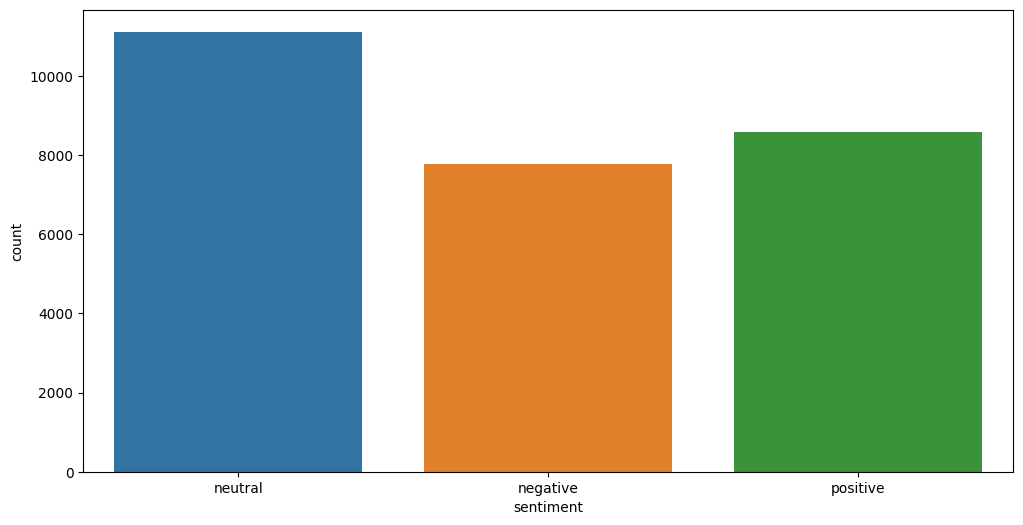

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [ ]:
# Define a function to categorize sentiment based on VADER score
def categorize_sentiment(score):
    if score < 0:
        return 'negative'
    elif score > 0:
        return 'positive'
    else:
        return 'neutral'

# Apply the function to create the 'SentimentCategory' column
data['SentimentCategory'] = data['SentimentVADER'].apply(categorize_sentiment)

In [ ]:
data.head(5)

,textID,text,selected_text,sentiment,cleaned_text,SentimentVADER,SentimentCategory
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,id responded going,0.0000,neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego,-0.7437,negative
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying,-0.5994,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview leave alone,-0.3595,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,sons couldnt put releases already bought,0.0000,neutral


In [ ]:
# Load NRC Emotion Lexicon
lexicon = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', sep='\t', header=None, names=['word', 'emotion', 'association'], comment=';')

In [ ]:
# Function to perform emotion detection for a given tweet
def detect_emotion(tweet):
    emotions = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}

    words = tweet.lower().split()

    for word in words:
        matches = lexicon[(lexicon['word'] == word) & (lexicon['association'] == 1)]

        for emotion in emotions.keys():
            emotions[emotion] += len(matches[matches['emotion'] == emotion])

    return emotions

# Apply emotion detection to each tweet in the dataset
data['emotions'] = data['cleaned_text'].apply(detect_emotion)

# Display the updated dataset with emotion counts
print("Updated Dataset with Emotion Counts:")
print(data['text', 'emotions'].head())

Updated Dataset with Emotion Counts:


KeyError: ignored